<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации" data-toc-modified-id="Исследование-суммарной-концентрации-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#функция-для-вычисления-итогового-sMAPE" data-toc-modified-id="функция-для-вычисления-итогового-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>функция для вычисления итогового sMAPE</a></span></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Моделирование</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Знакомство с данными

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')

In [3]:
train_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [5]:
train_df.duplicated().sum()

0

In [6]:
test_df.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [8]:
test_df.duplicated().sum()

0

In [9]:
full_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [10]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [11]:
full_df.duplicated().sum()

0

In [12]:
set(train_df.columns) - set(full_df.columns)

set()

In [13]:
missing_columns = set(train_df.columns) - set(test_df.columns)
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [14]:
len(full_df) == len(train_df) + len(test_df)

True

**Вывод**

В обучающей выборке присутствуют признаки, которых нет в тестовой.

В данных присутствуют незначительное количество пропусков

В данных отсутствуют дубликаты. 

Данные необходимо отмасштабировать (сделаем это позже)



### Проверка расчета эффективности обогащения

<img src="https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg">

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

In [15]:
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']

In [16]:
recovery_calculation = (C*(F-T)) / (F*(C-T)) * 100

In [17]:
mean_absolute_error(train_df['rougher.output.recovery'], recovery_calculation)

9.73512347450521e-15

In [18]:
(train_df['rougher.output.recovery'] - recovery_calculation).std()

1.47578371084376e-14

**Вывод**

Расчет произведен правильно. Ошибка MAE практически нулевая

### Анализ признаков, недоступных в тестовой выборке

In [19]:
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

**Вывод**

Признаки с параметром **output** - это параметры продукта, которые становятся известны в процессе обработки, следовательно они не могут быть известны для теста

Признаки **recovery**, по сути, наши целевые признаки.

### Предобработка данных

In [20]:
train_df = train_df.fillna(method='ffill')
test_df = test_df.fillna(method='ffill')

Поскольку *соседние по времени параметры часто похожи (по условию задания)*, заполнять пропуски будем соседним предыдущим значением.

In [21]:
test_df['rougher.output.recovery'] = full_df['rougher.output.recovery'].loc[test_df.index]
test_df['final.output.recovery'] = full_df['final.output.recovery'].loc[test_df.index]

Добавим в тестовый дата-сет целевые признаки, по которым мы будем считать финальные метрики.

In [22]:
train_df = train_df[test_df.columns]

Приведем трейн и тест к единому пространству признаков, оставив только те, что есть в тесте.

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [23]:
train_df.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [24]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

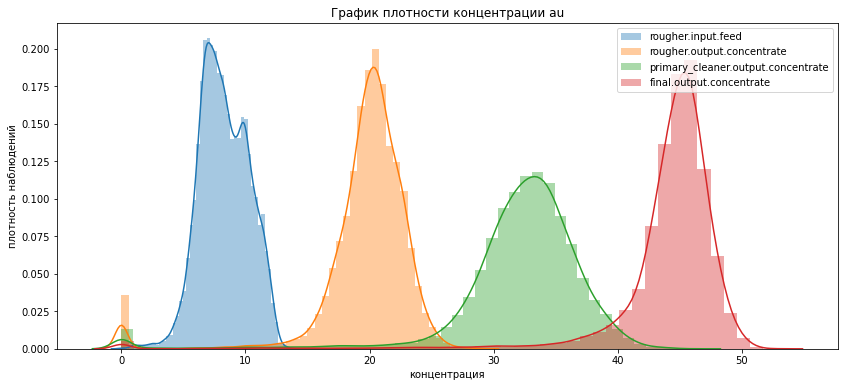

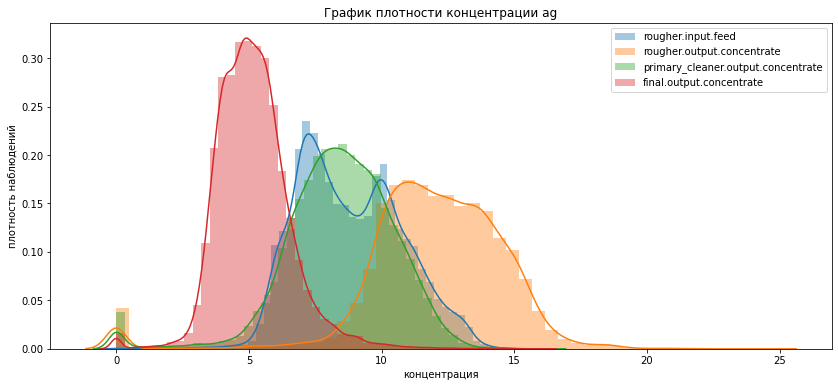

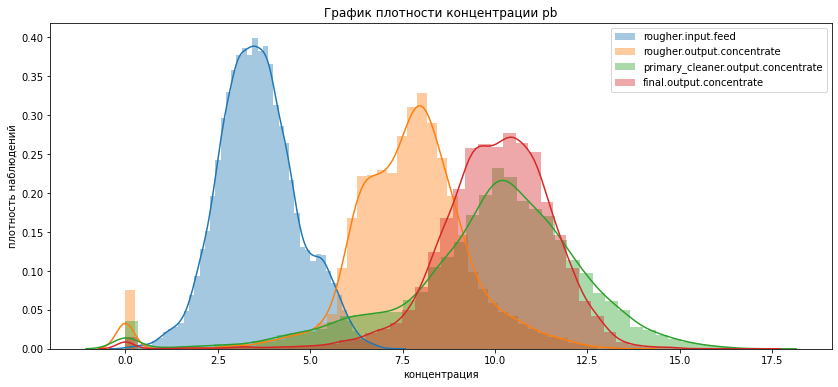

In [25]:
for metal in metals:
    plt.figure(figsize=(14, 6))
    for stage in stages:
        ax = sns.distplot(full_df[stage+'_'+metal], label=stage)
    plt.title('График плотности концентрации ' + metal)
    plt.ylabel('плотность наблюдений')
    plt.xlabel('концентрация')
    plt.legend()
    plt.show()

**Вывод**

Мы видим, что для концентрация золота (Au) растет от этапа к этапу. Концентрация серебра (Ag), напротив, снижается.

Для свинца (Pb) характерен рост после флотации, далее средняя концентрация не меняется.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

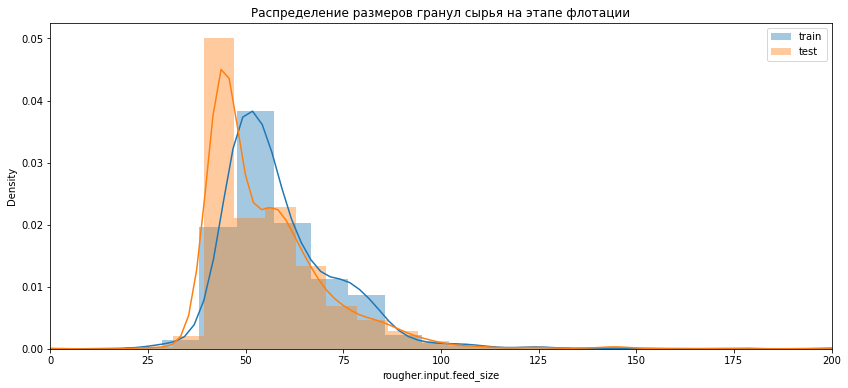

In [26]:
plt.figure(figsize=(14,6))
sns.distplot(train_df['rougher.input.feed_size'], label='train')
sns.distplot(test_df['rougher.input.feed_size'],label='test')
plt.legend()
plt.xlim(0,200)
plt.title('Распределение размеров гранул сырья на этапе флотации')
plt.show()

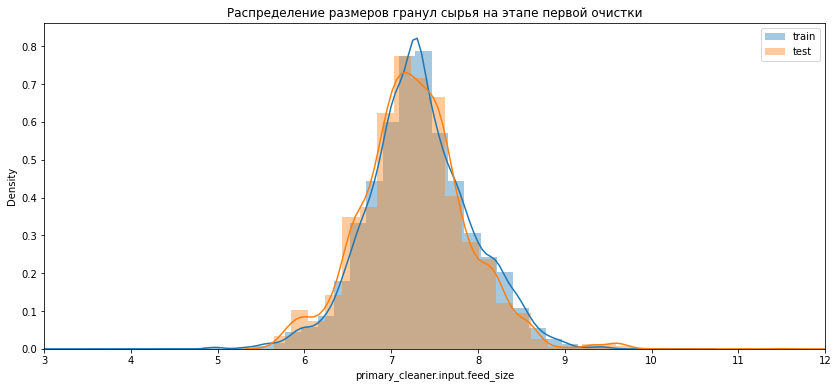

In [27]:
plt.figure(figsize=(14,6))
sns.distplot(train_df['primary_cleaner.input.feed_size'], label='train')
sns.distplot(test_df['primary_cleaner.input.feed_size'],label='test')
plt.legend()
plt.xlim(3,12)
plt.title('Распределение размеров гранул сырья на этапе первой очистки')
plt.show()

**Вывод**

размеры гранул на этапе флотации имеют разное распределение, а на этапе первой  очистки распределения схожи


In [28]:
train_df = train_df.drop(columns=['rougher.input.feed_size'])
test_df = test_df.drop(columns=['rougher.input.feed_size'])

### Исследование суммарной концентрации

In [29]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

In [30]:
total_concentrate_columns = []
for stage in stages:
    _ = [stage + '_' + metal for metal in metals]
    full_df[stage + '_total'] = full_df[_].sum(axis=1)
    total_concentrate_columns.append(stage + '_total')

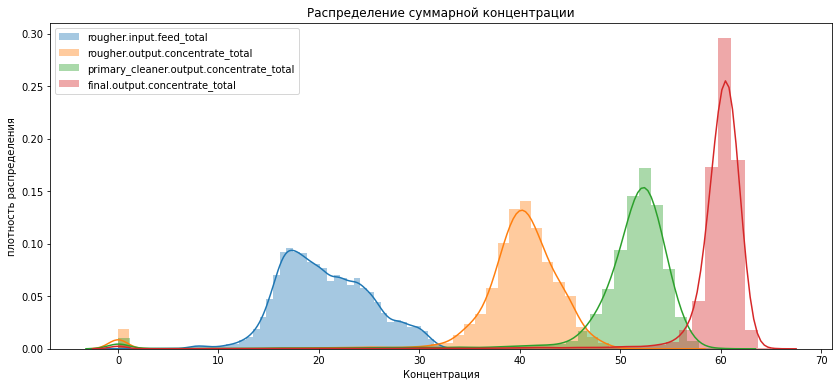

In [31]:
plt.figure(figsize=(14, 6))
for stage in total_concentrate_columns:
    ax = sns.distplot(full_df[stage], label=stage)
plt.title('Распределение суммарной концентрации')
plt.ylabel('плотность распределения')
plt.xlabel('Концентрация')
plt.legend()
plt.show()

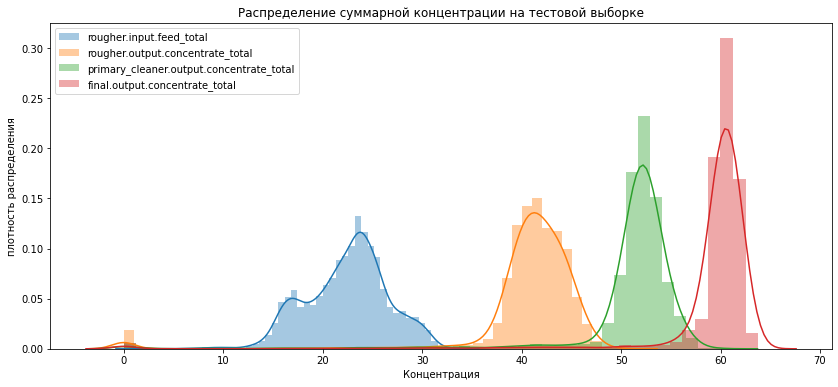

In [32]:
plt.figure(figsize=(14, 6))
for stage in total_concentrate_columns:
    ax = sns.distplot(full_df.loc[test_df.index][stage], label=stage)
plt.title('Распределение суммарной концентрации на тестовой выборке')
plt.ylabel('плотность распределения')
plt.xlabel('Концентрация')
plt.legend()
plt.show()

**Вывод**

Суммарная концентрация растет от этапа к этапу. В основном за счет того, что концентрация золота имеет большие значения, чем остальные металлы.

In [33]:
outliers_idx = full_df[full_df['final.output.concentrate_total'] < 2].index

In [34]:
train_clean_idx = [idx for idx in train_df.index if idx not in outliers_idx]
test_clean_idx = [idx for idx in test_df.index if idx not in outliers_idx]

In [35]:
test_outliers_idx = [idx for idx in test_df.index if idx in outliers_idx]

## Модель

Подготовим данные для обучения. Разделим их на трейн и тест и отмасштабируем

In [36]:
y_train_rougher = train_df.loc[train_clean_idx]['rougher.output.recovery'].values
y_train_final = train_df.loc[train_clean_idx]['final.output.recovery'].values
x_train = train_df.drop(columns=['rougher.output.recovery', 'final.output.recovery'])

y_test_rougher = test_df['rougher.output.recovery'].values
y_test_final = test_df['final.output.recovery'].values
x_test = test_df.drop(columns=['rougher.output.recovery', 'final.output.recovery'])

In [37]:
x_train = x_train.loc[train_clean_idx]

In [38]:
# scaler = StandardScaler()

# x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
# x_test[x_train.columns] = scaler.transform(x_test[x_train.columns])

###  функция для вычисления итогового sMAPE

<img src='https://pictures.s3.yandex.net/resources/smape_1576238825.jpg'>

<img src='https://pictures.s3.yandex.net/resources/_smape_1576238814.jpg'>

In [39]:
def sMAPE(y_true, y_pred):
    y_true = pd.Series(y_true)
    y_pred = pd.Series(y_pred)
    
    return np.mean(abs(y_true-y_pred) / ((abs(y_true) + abs(y_pred)) / 2)) * 100

In [40]:
def total_sMAPE(y_true_r, y_true_f,y_pred_r, y_pred_f, r_coef=.25, f_coef=.75):
    return r_coef * sMAPE(y_true_r, y_pred_r) + f_coef * sMAPE(y_true_f, y_pred_f)    

### Моделирование

In [41]:
sMAPE_scorer = make_scorer(sMAPE, greater_is_better=False)

In [42]:
CV = 3

In [43]:
result = pd.DataFrame(columns=['model', 'roughter sMAPE', 'final sMAPE']) # датафрейм для сравнения моделей

In [44]:
pipeline_lr = make_pipeline(StandardScaler(), LinearRegression())

result.loc[-1] = ['linear regression',
                  np.mean(cross_val_score(pipeline_lr, x_train, y_train_rougher, cv=CV, scoring=sMAPE_scorer)),
                  np.mean(cross_val_score(pipeline_lr, x_train, y_train_final, cv=CV, scoring=sMAPE_scorer))]

result.reset_index(drop=True, inplace=True)
result

,model,roughter sMAPE,final sMAPE
0,linear regression,-17.177673,-14.010349


У нас отрицательные значения sMAPE, поскольку создавая скорер мы указали параметр greater_is_better=False. Держим в голове, что чем ближе к нулю, тем лучше

In [45]:
# params_rf = {'max_depth': [4, 8, 12, 16],
#              'min_samples_split': [1, 2, 3]}

params_rf = {'max_depth': [4, 6, 8],
             'n_estimators': [50, 80]}

In [46]:
model_rf = RandomForestRegressor(random_state=1)

In [47]:
%%time
grid_rf_r = GridSearchCV(model_rf, param_grid=params_rf, cv=CV, verbose=1, scoring=sMAPE_scorer, n_jobs=-1)
grid_rf_r.fit(x_train, y_train_rougher)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
CPU times: user 3min 36s, sys: 216 ms, total: 3min 36s
Wall time: 3min 36s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [50, 80]},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=1)

In [48]:
grid_rf_r.best_params_

{'max_depth': 6, 'n_estimators': 80}

In [49]:
%%time
grid_rf_f = GridSearchCV(model_rf, param_grid=params_rf, cv=CV, verbose=1, scoring=sMAPE_scorer, n_jobs=-1)
grid_rf_f.fit(x_train, y_train_final)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
CPU times: user 3min 29s, sys: 168 ms, total: 3min 29s
Wall time: 3min 30s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8], 'n_estimators': [50, 80]},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=1)

In [50]:
grid_rf_f.best_params_

{'max_depth': 6, 'n_estimators': 80}

In [51]:
result.loc[-1] = ['random forrest',
                  grid_rf_r.best_score_,
                  grid_rf_f.best_score_]

result.reset_index(drop=True, inplace=True)
result

,model,roughter sMAPE,final sMAPE
0,linear regression,-17.177673,-14.010349
1,random forrest,-11.841728,-11.325003


In [52]:
cb_model = CatBoostRegressor(random_state=1, verbose=0)

In [53]:
params_cb = {'n_estimators': [50, 100, 200],
          'depth': [4, 6, 10],
          'l2_leaf_reg': [1, 3]}

In [54]:
%%time
grid_cb_r = GridSearchCV(cb_model, param_grid=params_cb, cv=CV, verbose=1, scoring=sMAPE_scorer, n_jobs=-1)
grid_cb_r.fit(x_train, y_train_rougher)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
CPU times: user 4min 37s, sys: 753 ms, total: 4min 38s
Wall time: 5min 4s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f51471ebee0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=1)

In [55]:
grid_cb_r.best_params_

{'depth': 4, 'l2_leaf_reg': 1, 'n_estimators': 100}

In [56]:
%%time
grid_cb_f = GridSearchCV(cb_model, param_grid=params_cb, cv=CV, verbose=1, scoring=sMAPE_scorer, n_jobs=-1)
grid_cb_f.fit(x_train, y_train_final)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
CPU times: user 4min 45s, sys: 844 ms, total: 4min 46s
Wall time: 5min 16s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f51471ebee0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 10], 'l2_leaf_reg': [1, 3],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(sMAPE, greater_is_better=False), verbose=1)

In [57]:
grid_cb_f.best_params_

{'depth': 10, 'l2_leaf_reg': 1, 'n_estimators': 50}

In [58]:
result.loc[-1] = ['catboost',
                  grid_cb_r.best_score_,
                  grid_cb_f.best_score_]

result.reset_index(drop=True, inplace=True)
result

,model,roughter sMAPE,final sMAPE
0,linear regression,-17.177673,-14.010349
1,random forrest,-11.841728,-11.325003
2,catboost,-11.550006,-10.230342


In [59]:
result['total sMAPE'] = 0.25*result['roughter sMAPE'] + 0.75*result['final sMAPE']
result                                                                 

,model,roughter sMAPE,final sMAPE,total sMAPE
0,linear regression,-17.177673,-14.010349,-14.802180
1,random forrest,-11.841728,-11.325003,-11.454184
2,catboost,-11.550006,-10.230342,-10.560258


Лучше всего отработал Catboost, делаем предсказание на тестовой выборке данными моделями.

### Проверка лучшей модели на тестовой выборке

In [60]:
predict_r = grid_cb_r.predict(x_test)
predict_f = grid_cb_f.predict(x_test)

In [61]:
total_sMAPE(y_test_rougher, y_test_final, predict_r, predict_f)

9.123637560130604

In [62]:
y_test_rougher_clean = test_df.loc[test_clean_idx]['rougher.output.recovery'].values
y_test_final_clean = test_df.loc[test_clean_idx]['final.output.recovery'].values
x_test_clean = test_df.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
x_test_clean = x_test.loc[test_clean_idx]

predict_r_clean = grid_cb_r.predict(x_test_clean)
predict_f_clean = grid_cb_f.predict(x_test_clean)

total_sMAPE(y_test_rougher_clean, y_test_final_clean, predict_r_clean, predict_f_clean)

7.998059642145099

In [63]:
y_test_rougher_outlier = test_df.loc[test_outliers_idx]['rougher.output.recovery'].values
y_test_final_outlier = test_df.loc[test_outliers_idx]['final.output.recovery'].values
x_test_outlier = test_df.drop(columns=['rougher.output.recovery', 'final.output.recovery'])
x_test_outlier = x_test.loc[test_outliers_idx]

predict_r_outlier = grid_cb_r.predict(x_test_outlier)
predict_f_outlier = grid_cb_f.predict(x_test_outlier)

total_sMAPE(y_test_rougher_outlier, y_test_final_outlier, predict_r_outlier, predict_f_outlier)

153.22506418222588

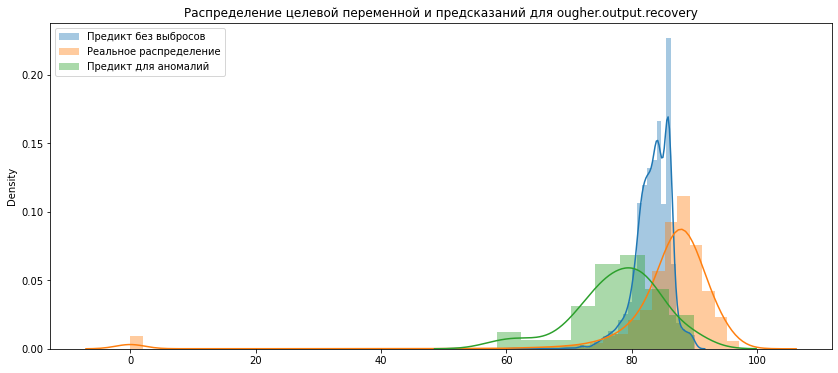

In [64]:
plt.figure(figsize=(14,6))
sns.distplot(predict_r_clean, label='Предикт без выбросов')
sns.distplot(y_test_rougher, label='Реальное распределение')
sns.distplot(predict_r_outlier, label='Предикт для аномалий')
plt.title('Распределение целевой переменной и предсказаний для ougher.output.recovery')
plt.legend()
plt.show()

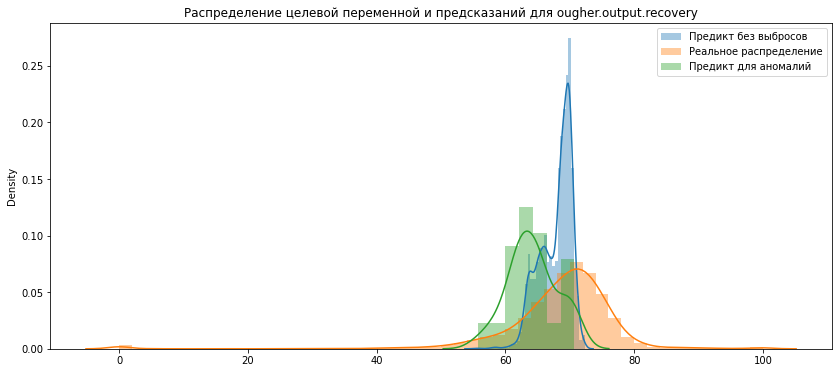

In [65]:
plt.figure(figsize=(14,6))
sns.distplot(predict_f_clean, label='Предикт без выбросов')
sns.distplot(y_test_final, label='Реальное распределение')
sns.distplot(predict_f_outlier, label='Предикт для аномалий')
plt.title('Распределение целевой переменной и предсказаний для ougher.output.recovery')
plt.legend()
plt.show()

In [66]:
baseline_model_r = DummyRegressor(strategy='median')
baseline_model_f = DummyRegressor(strategy='median')
baseline_model_r.fit(x_train, y_train_rougher)
baseline_model_f.fit(x_train, y_train_final)

bs_pred_r = baseline_model_r.predict(x_test)
bs_pred_f = baseline_model_f.predict(x_test)

total_sMAPE(y_test_rougher, y_test_final, bs_pred_r, bs_pred_f)

9.468322100987306

**Итоги**

Мы создание модель машинного обучения, предсказывающую процент восстановления золота из руды.

Для этого мы изучили полный набор данных. На основании технологического процесса часть признаков были исключены из тестовой выборки, поскольку на момент необходимости сделать предсказания они еще не доступны.

Были изучены показатели концентрации металлов на различных этапах технологического процесса.

На полученных данных было обучено несколько моделей, по результатам который лучшая из них показала итоговый sMAPE 11.986